In [46]:
import numpy as np

In [47]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [48]:
# Train 과 test 분리
from sklearn.model_selection import train_test_split

In [49]:
train_input, test_input, train_target, test_target  = \
    train_test_split(fish_length,fish_weight,random_state=42)
    # random_state = set.seed 수업에서만 사용

In [50]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [51]:
train_input = train_input.reshape(-1,1)
# 2차원 배열로 만듬 (열 형태로 )
test_input = test_input.reshape(-1,1)
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
knr = KNeighborsRegressor(n_neighbors=3)
# 학습
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

---
# 길이가 50cm인 생선의 무게를 예측

In [54]:
knr.predict([[50]])
# train_input의 모양과 같게 

array([1033.33333333])

### 기존의 데이터로 무게 확인

In [55]:
train_target.max()

1100.0

In [56]:
train_input.max()
# 생선의 길이의 최대값 

44.0

### 산점도 이웃을 구해서 확인해보자

In [57]:
import matplotlib.pyplot as plt

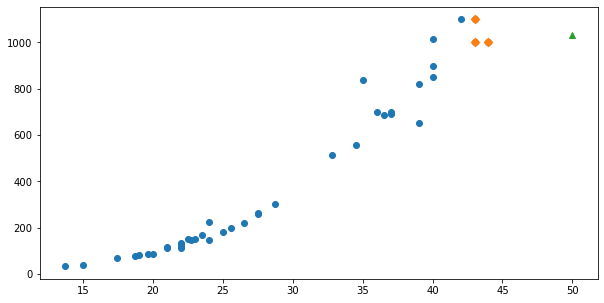

In [58]:
# 50cm 이웃을 구합니다.
distance, indexes = knr.kneighbors([[50]])
# distance = 생선의 길이, indexes = 생선의 무게 
# 훈련 세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target)

# 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

# 50cm 생선
plt.scatter(50,1033,marker='^')
plt.show()

# knr 예측불가 이웃 데이터와도 많이 떨어져 있으므로…

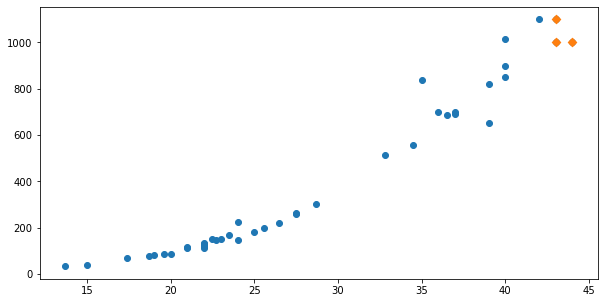

In [59]:
# 100cm 이웃을 구합니다.
distance, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target)

# 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

# 50cm 생선
#plt.scatter(50,1033,marker='^')
plt.show()

# knr 예측불가 이웃 데이터와도 많이 떨어져 있으므로…

---
### 선형회귀(linear Regression)
: 직선이나 곡선의 함수식(Y=aX +b)을 이용하여 구하느 방식으로 로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
# 모델 적용
lr  = LinearRegression()

In [62]:
lr.fit(train_input,train_target)

LinearRegression()

In [63]:
#예측 
lr.predict([[50]])

array([1241.83860323])

In [64]:
# Y= aX + b 에서 기울기와 절편을 출력 (deep learning에서는  weight와 bias로 불림)
print(lr.coef_,lr.intercept_)
# 기울기가 리스트 형식으로 출력됨 
# 다항식으로 변환되면 ax1 + ax2 + b로 바뀌어서 기울기가 리스트로 출력 

[39.01714496] -709.0186449535477


In [65]:
39.01714496 * 50 + -709.0186449535477

1241.8386030464526

### 산점도 그려보기


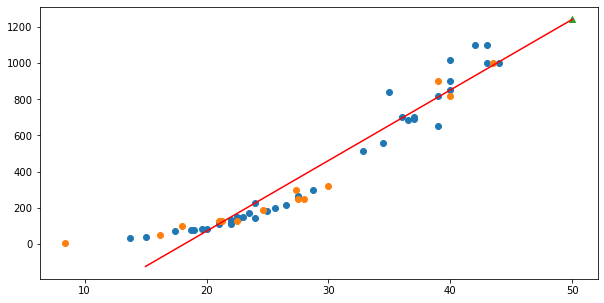

In [69]:
plt.figure(figsize =(10,5))
# 훈련세트의 산점도를 그립니다
plt.scatter(train_input,train_target)
# test의 산점도를 그린다
plt.scatter(test_input,test_target)

# 15에서 50까지의 1차 방정식 그래프를 그립니다,
plt.plot(
    [15,50],     # x의 리스트 
    # y의 리스트 
    [15*lr.coef_ + lr.intercept_, 50 *lr.coef_ + lr.intercept_],
    c= "red"
)
# 50cm의 생선 데이터
plt.scatter(50,1241.8,marker="^")

plt.show()

> 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수가 발생할 수 있다. 
> 절편이 음수이다.

In [67]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


> 과대적합이 발생

---
### 다항 회귀 
Y = $ax^2$ +bX +C 
- 항이 여러개 있고 feature가 하나인 것을 이미 
- feature가 여러개인것은 다중회귀

In [71]:
# feature를 제곱한 column을 생성하여 기존의 column에 붙인다.

train_poly = np.column_stack((train_input **2, train_input))
# ax^
test_poly = np.column_stack((test_input **2, test_input))

In [72]:
print(train_poly.shape, test_input.shape)

(42, 2) (14, 1)


In [73]:
# 모델 적용
lr = LinearRegression()

In [75]:
# 학습
lr.fit(train_ploy,train_target)

LinearRegression()

In [76]:
# 50cm 생선에 대한 예측(1241.8)
lr.predict([[50**2,50]])

array([1573.98423528])

In [77]:
# 기울기와 절편
print(lr.coef_,lr.intercept_)
# 기울기 2개와 절편이 +로 나옴 

[  1.01433211 -21.55792498] 116.05021078278259


> 과대적합이 발생하여 다항식으로 변환해준 것임(train, test의 차를 줄이기 위해서)

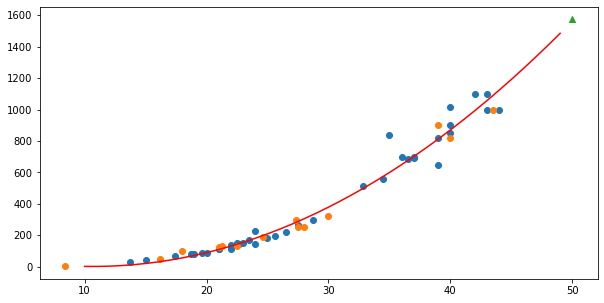

In [82]:
# 구간별 직선을 그리기 위해 15에서 49까지의 정수 배열을 만듭니다
point = np.arange(10,50)
# 산점도
plt.figure(figsize =(10,5))
# 훈련세트의 산점도를 그립니다
plt.scatter(train_input,train_target)
# test의 산점도를 그린다
plt.scatter(test_input,test_target)

# 15에서 50까지의 1차 방정식 그래프를 그립니다,
plt.plot(
    point,# x의 리스트 
    1.01*point**2 + -21.55*point +116.05,
    c="r" 
)
# 50cm의 생선 데이터
plt.scatter(50,1574,marker="^")

plt.show()

In [85]:
# 과대적화과 과소적합
print(lr.score(train_ploy,train_target))
print(lr.score(test_ploy,test_target))

0.9706807451768623
0.9775935108325121


> 약간의 과소적합이 발생하였지만 차이값은 0.07로 줄어들어 이 모델로 사용해도 됨
> 단순회귀보다는 다항회귀가 진전이 있었다. 
> 5 % 이내는 괜찮음 